In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [20]:
df = pd.read_csv('./data/brilliance_clean.csv')
print(df.shape)

(23205, 13)


In [21]:
df.columns

Index(['Carat Weight', 'Color', 'Clarity', 'Cut', 'Depth %', 'Table %',
       'Polish', 'Symmetry', 'Cut Grade', 'Length to Width', 'Culet',
       'Fluorescence', 'Price'],
      dtype='object')

In [22]:
df['Symmetry'].value_counts()

1    18177
2     4464
3      564
Name: Symmetry, dtype: int64

<AxesSubplot:xlabel='Symmetry', ylabel='Price'>

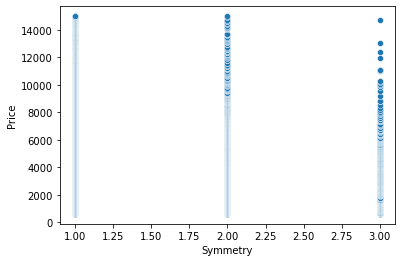

In [23]:
sns.scatterplot(x=df['Symmetry'],y=df['Price'])

In [24]:
# combine Fair and Poor in
cut_d = {1:1,2:2,3:3,4:4,5:4}
df['Cut Grade'] = df['Cut Grade'].map(cut_d)

0        1
1        1
2        2
3        1
4        2
        ..
23200    2
23201    1
23202    1
23203    3
23204    1
Name: Cut Grade, Length: 23205, dtype: int64

<AxesSubplot:xlabel='Cut Grade', ylabel='Price'>

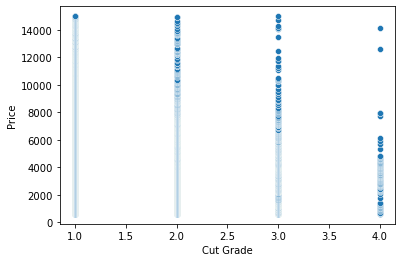

In [28]:
sns.scatterplot(x=df['Cut Grade'],y=df['Price'])

In [29]:
# combine very small, small, medium to same category
df['Culet'].value_counts()
culet_d = {1:1, 2:2,3:2,4:2}
df['Culet'] = df['Culet'].map(culet_d)
df['Culet'].value_counts()

1.0    19410
2.0      111
Name: Culet, dtype: int64

In [42]:
df['Culet']=df['Culet'].fillna(0)

<AxesSubplot:xlabel='Culet', ylabel='Price'>

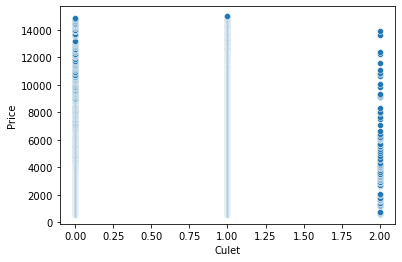

In [44]:
sns.scatterplot(x=df['Culet'],y=df['Price'])

In [37]:
df['Fluorescence'].value_counts()
flo_d = {0:1,1:2,2:3,3:4}
df['Fluorescence'] = df['Fluorescence'].map(flo_d)
df['Fluorescence'].value_counts()

1    15330
2     4270
3     2315
4     1290
Name: Fluorescence, dtype: int64

In [65]:
df['Carat SQ'] = df['Carat Weight'] ** 2
df['Carat CUBE'] = df['Carat Weight'] ** 3

In [66]:
df['FourC'] = df['Carat Weight'] * df['Color'] * df['Clarity'] * df['Cut']
df['DT Ratio'] = df['Depth %'] / df['Table %']
df['Shine'] = df['Polish'] * df['Symmetry'] * df['Fluorescence']
df.head(5)

,Carat Weight,Color,Clarity,Cut,Depth %,Table %,Polish,Symmetry,Cut Grade,Length to Width,Culet,Fluorescence,Price,Carat SQ,FourC,DT Ratio,Shine,Carat CUBE
0,0.23,1,3,1,61.3,60.0,1,1,1,1.01,1.0,3,600,0.0529,0.69,1.021667,3,0.012167
1,0.43,8,7,1,62.6,56.0,1,1,1,1.01,0.0,2,600,0.1849,24.08,1.117857,2,0.079507
2,0.30,2,8,3,63.9,57.0,1,2,2,1.01,1.0,2,600,0.0900,14.40,1.121053,4,0.027000
3,0.30,8,3,1,61.3,57.0,1,1,1,1.01,1.0,1,600,0.0900,7.20,1.075439,1,0.027000
4,0.40,7,8,2,62.0,59.0,2,2,2,1.00,1.0,2,600,0.1600,44.80,1.050847,8,0.064000


<AxesSubplot:>

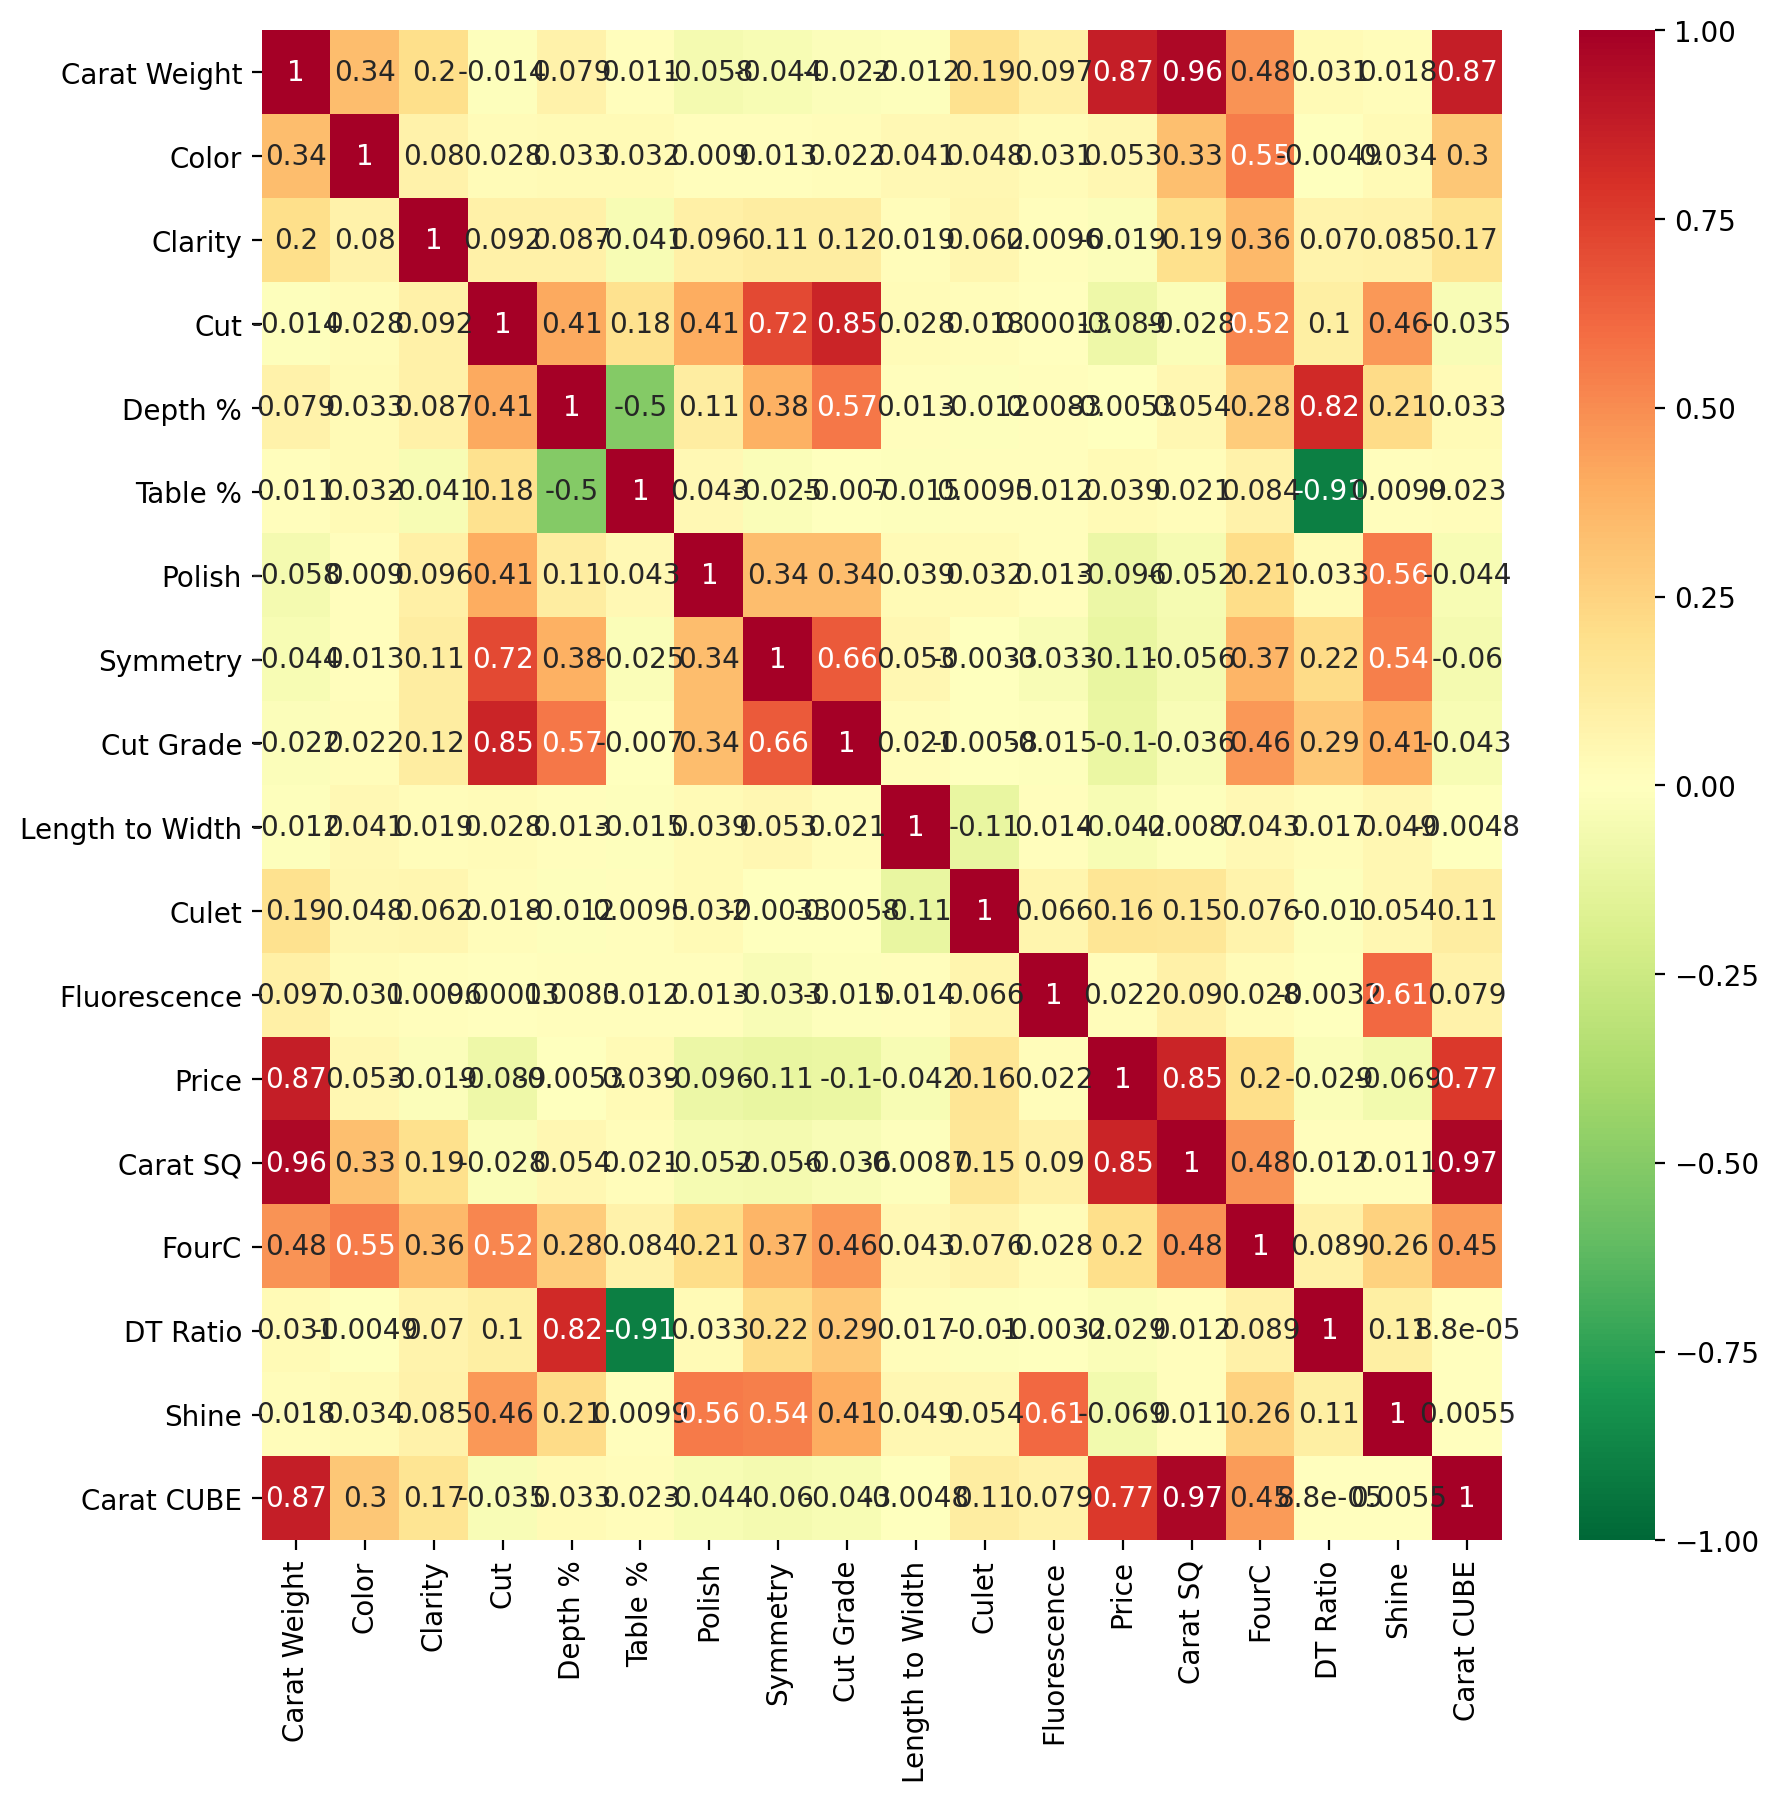

In [89]:
plt.figure(figsize=(10,10),dpi=200)
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap="RdYlGn_r")

# MULTIPLE LINEAR REGRESSION

In [48]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn import metrics
import scipy.stats as stats

In [67]:
df.columns

Index(['Carat Weight', 'Color', 'Clarity', 'Cut', 'Depth %', 'Table %',
       'Polish', 'Symmetry', 'Cut Grade', 'Length to Width', 'Culet',
       'Fluorescence', 'Price', 'Carat SQ', 'FourC', 'DT Ratio', 'Shine',
       'Carat CUBE'],
      dtype='object')

In [102]:
mfc = ['Carat Weight', 'Color', 'Clarity', 'Cut', 'Depth %', 'Table %',
       'Polish', 'Symmetry', 'Cut Grade', 'Length to Width', 'Culet',
       'Fluorescence','Carat SQ','FourC','DT Ratio','Shine','Carat CUBE']
X1 = df[['Carat Weight']]
X = df[mfc]
y = df.Price

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.20, random_state=11)

In [104]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=12)
X1_tr, X1_val, y1_tr, y1_val = train_test_split(X1_train, y1_train, test_size=.25, random_state=12)

In [106]:
X_tr.shape
X1_tr.shape

(13923, 1)

In [107]:
y_tr.shape

(13923,)

In [336]:
# TRAIN (66% of 75%)
# X_tr, y_tr

# VALIDATE (33% of 75%)
# X_val, y_val

# TEST (25% of data)
# X_test, y_test

In [108]:
lr = LinearRegression()
lr.fit(X_tr,y_tr)
lr1 = LinearRegression()
lr1.fit(X1_tr,y1_tr)

LinearRegression()

### Coefficients

In [109]:
list(zip(mfc,lr.coef_))
list(zip(df['Carat Weight'],lr1.coef_))

[(0.23, 7968.60334213727)]

In [114]:
# predict on training set
yhat_tr = lr.predict(X_tr)
y1hat_tr = lr1.predict(X1_tr)

In [115]:
# predict on val set
yhat_val = lr.predict(X_val)
y1hat_val = lr1.predict(X1_val)

### Metrics

In [116]:
print('Training Predictions RSQ:',metrics.r2_score(y1_tr, y1hat_tr))
print('Val Predictions RSQ:',metrics.r2_score(y1_val, y1hat_val))

Training Predictions RSQ: 0.7669343424981886
Val Predictions RSQ: 0.7568748013020133


In [75]:
print('Training Predictions RSQ:',metrics.r2_score(y_tr, yhat_tr))
print('Val Predictions RSQ:',metrics.r2_score(y_val, yhat_val))

Training Predictions RSQ: 0.8951871258159052
Val Predictions RSQ: 0.8912426259710123


In [76]:
print('Training Predictions MAE:',metrics.mean_absolute_error(y_tr, yhat_tr))
print('Val Predictions MAE:',metrics.mean_absolute_error(y_val, yhat_val))

Training Predictions MAE: 724.4679933991563
Val Predictions MAE: 733.8135433023945


In [77]:
print('Training Predictions RMAE:',np.sqrt(metrics.mean_squared_error(y_tr, yhat_tr)))
print('Val Predictions RMAE:',np.sqrt(metrics.mean_squared_error(y_val, yhat_val)))

Training Predictions RMAE: 993.6581755574091
Val Predictions RMAE: 1014.8320446691517


### Residuals

In [78]:
val_res = y_val - yhat_val

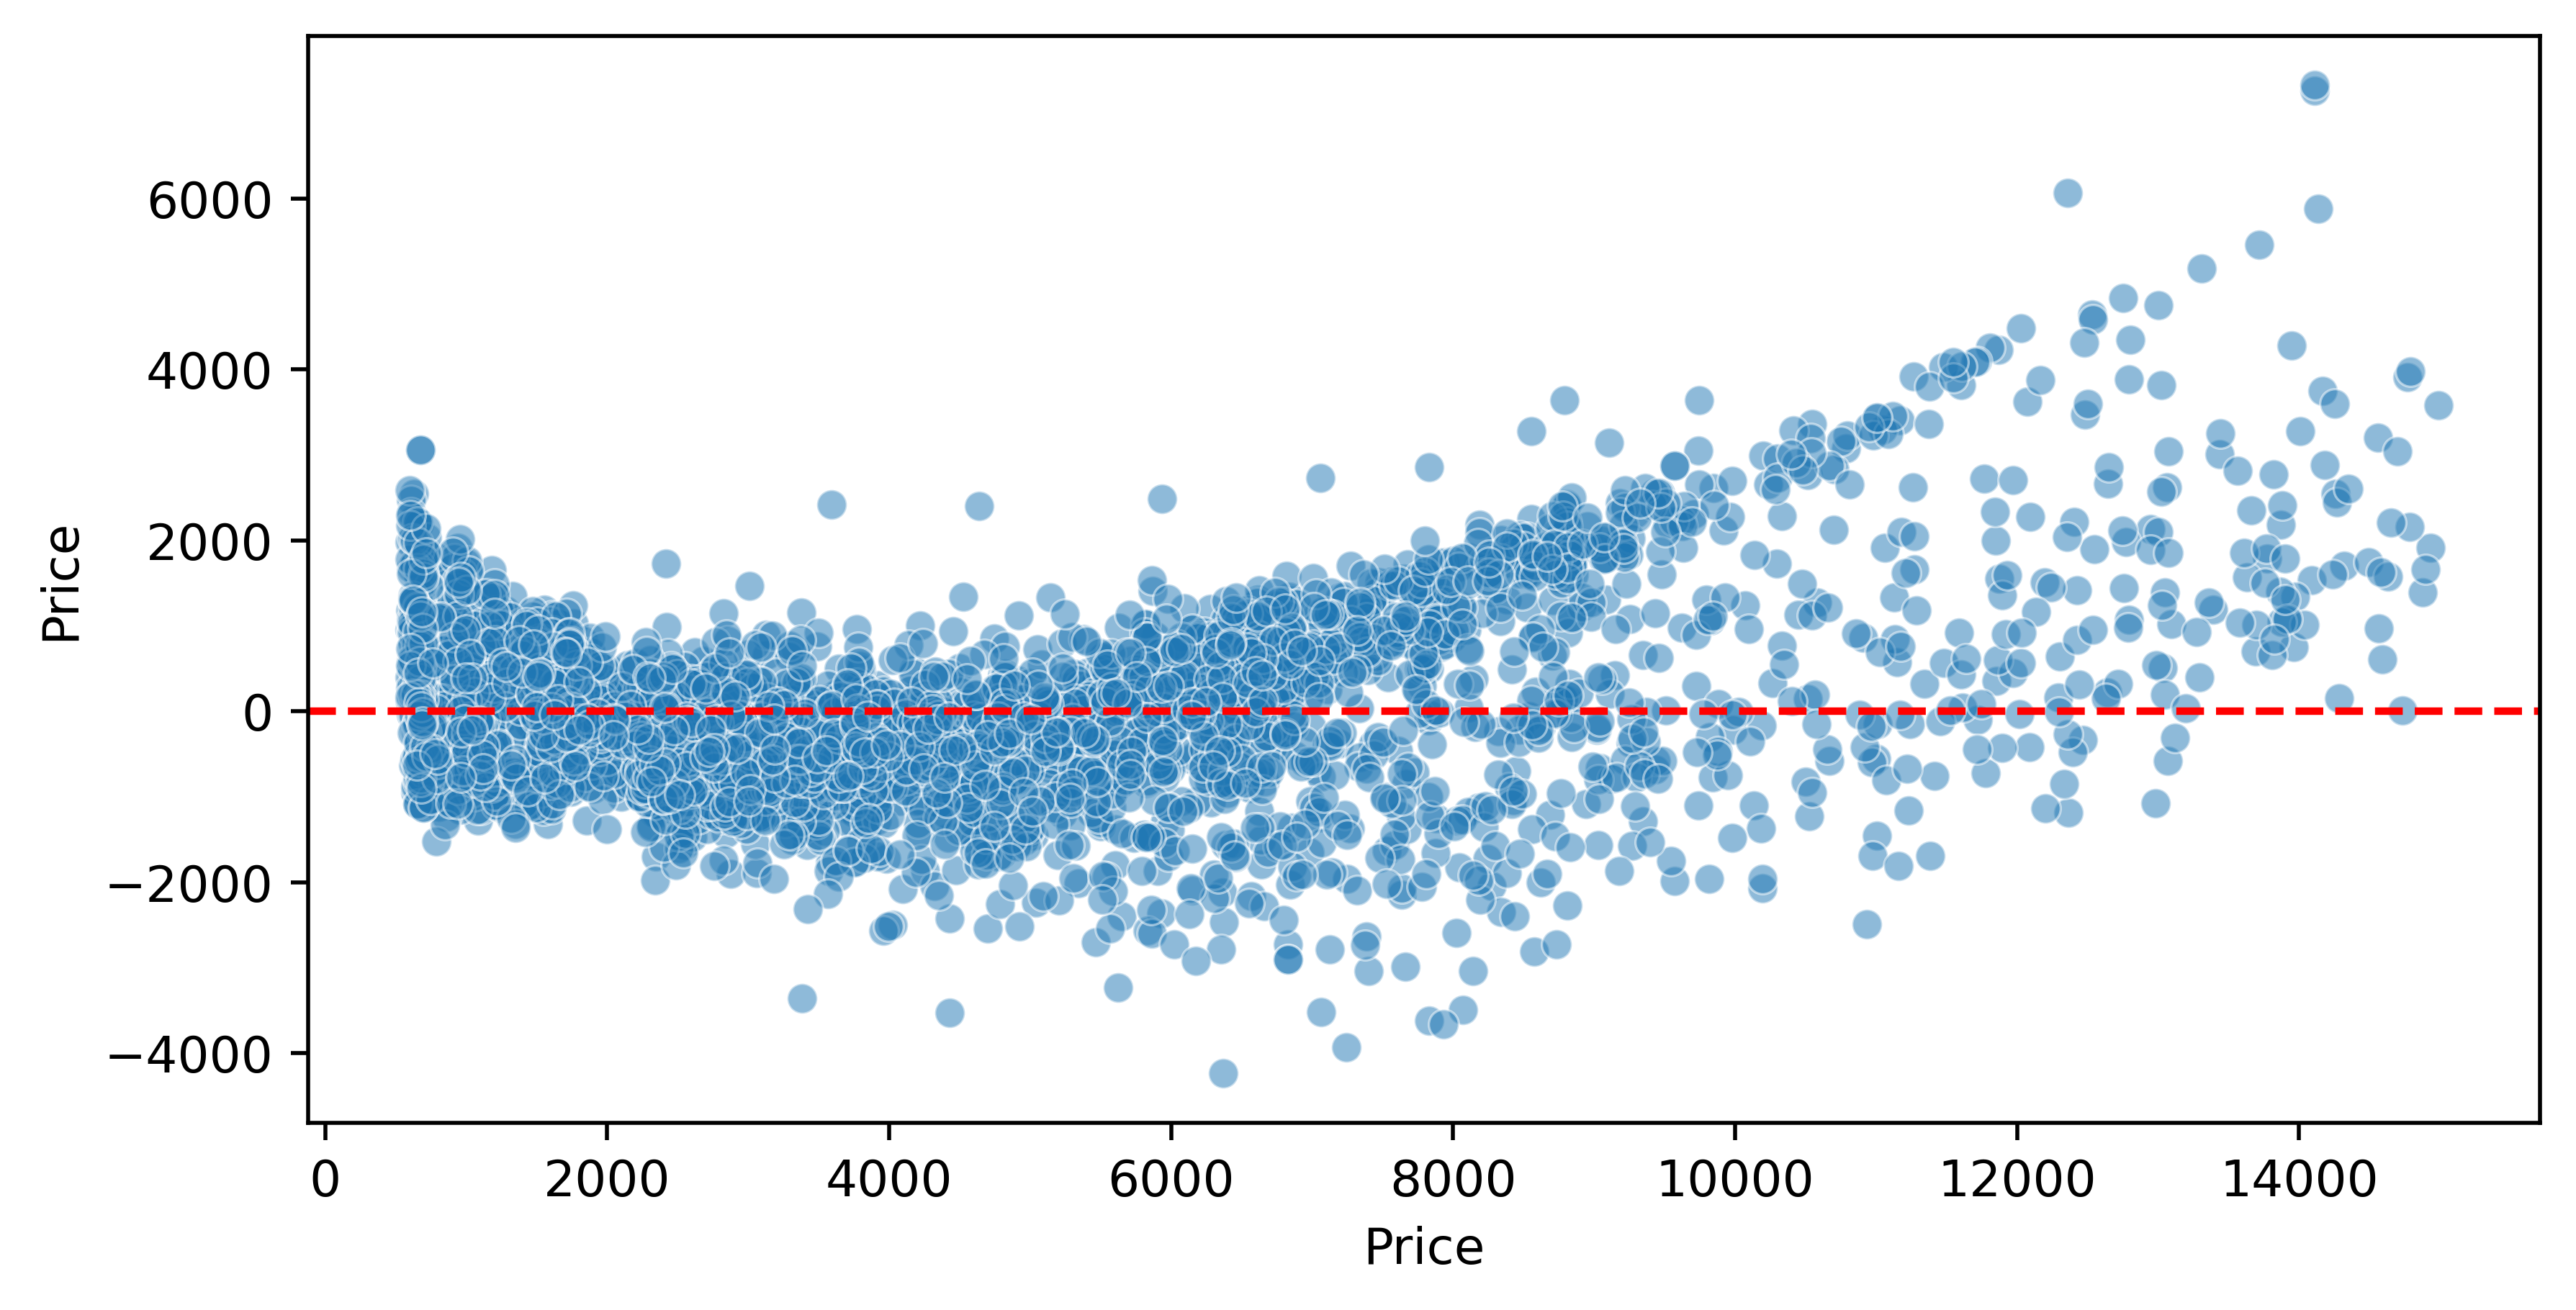

In [79]:
fig = plt.figure(figsize=(8,4),dpi=500)
sns.scatterplot(x=y_val,y=val_res,alpha=.5)
plt.axhline(y=0,color='r',ls='--')

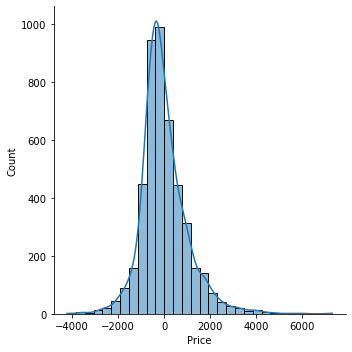

In [80]:
sns.displot(val_res,bins=30,kde=True)

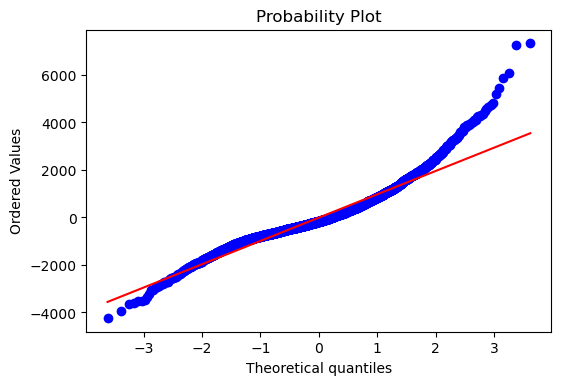

In [93]:
fig,ax = plt.subplots(figsize=(6,4),dpi=100)
_ = stats.probplot(val_res,plot=ax)

In [96]:
#g = sns.PairGrid(df, diag_sharey=False, corner=True)
#g.map_lower(sns.scatterplot)
#g.map_diag(sns.kdeplot)